# Experiment 2: Using averaged photos

### Training

We first import the required libraries, and set up the model, dataloaders and optimizer for training

In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn, optim

from model import Generator
from dataset import EmbedImagePairs
from train import train, test, synthesize

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = Generator(128).to(device)

trn_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/train_avg', size=64, n_hidden=128), batch_size=200, shuffle=True)
val_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/val', size=64, n_hidden=128, train=False), batch_size=100)
dataloader_dict = {'train': trn_dataloader, 'val': val_dataloader}

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters())

We create a folder to store all the outputs of this training run

In [3]:
# !rm -r "models/pytorch/128_avg"
!mkdir -p "models/pytorch/128_avg"

Uncomment the following cell to install dlib if it's not installed already, and get the required models

In [ ]:
# uncomment out if you want to compute validation metrics using dlib
# !pip install dlib

# !mkdir -p "models/dlib"

# !wget "http://dlib.net/files/dlib_face_recognition_resnet_model_v1.dat.bz2" -O "models/dlib/facerec.dat.bz2"
# !wget "http://dlib.net/files/shape_predictor_5_face_landmarks.dat.bz2" -O "models/dlib/facelandmarks.dat.bz2"

# !bzip2 -d "models/dlib/facerec.dat.bz2"
# !bzip2 -d "models/dlib/facelandmarks.dat.bz2"

In [4]:
import dlib

face_detector = dlib.get_frontal_face_detector()
landmark_detector = dlib.shape_predictor('models/dlib/facelandmarks.dat')
face_embedder = dlib.face_recognition_model_v1('models/dlib/facerec.dat')

dlib_models = [face_detector, landmark_detector, face_embedder]

We train the model for 150 epochs, performing a validation run every 10 epochs

In [6]:
validate_every=10
num_epochs=150

train(model, dataloader_dict, criterion, optimizer, device, out_name='models/pytorch/128_avg/model', 
      dlib_models=dlib_models, validate=True, validate_every=validate_every, num_epochs=num_epochs)


  6%|▌         | 9/150 [00:17<04:25,  1.88s/it]

saving at epoch 10



  7%|▋         | 10/150 [00:20<05:43,  2.45s/it]

Epoch:  10 Train Loss: 0.005503633321830253 Val Loss: 0.08476116165386892 Average Distance: 0.6482976042462809



 13%|█▎        | 19/150 [00:37<04:09,  1.90s/it]

saving at epoch 20



 13%|█▎        | 20/150 [00:41<05:21,  2.47s/it]

Epoch:  20 Train Loss: 0.0035082149565562435 Val Loss: 0.09036935450492707 Average Distance: 0.5933327321365615



 19%|█▉        | 29/150 [00:58<03:53,  1.93s/it]

saving at epoch 30



 20%|██        | 30/150 [01:02<04:57,  2.48s/it]

Epoch:  30 Train Loss: 0.002636124529800881 Val Loss: 0.09173838794231415 Average Distance: 0.5608694872554429



 26%|██▌       | 39/150 [01:19<03:33,  1.93s/it]

saving at epoch 40



 27%|██▋       | 40/150 [01:23<04:31,  2.47s/it]

Epoch:  40 Train Loss: 0.002208113207364048 Val Loss: 0.0960594054344481 Average Distance: 0.5502513274569063



 33%|███▎      | 49/150 [01:40<03:13,  1.91s/it]

saving at epoch 50



 33%|███▎      | 50/150 [01:44<04:07,  2.48s/it]

Epoch:  50 Train Loss: 0.001915522805554257 Val Loss: 0.09525882472506667 Average Distance: 0.5242195284927453



 39%|███▉      | 59/150 [02:01<02:56,  1.94s/it]

saving at epoch 60



 40%|████      | 60/150 [02:05<03:43,  2.48s/it]

Epoch:  60 Train Loss: 0.0015679741379986893 Val Loss: 0.09515490237854224 Average Distance: 0.5176397846067173



 46%|████▌     | 69/150 [02:22<02:34,  1.90s/it]

saving at epoch 70



 47%|████▋     | 70/150 [02:25<03:17,  2.47s/it]

Epoch:  70 Train Loss: 0.0013491007694760445 Val Loss: 0.09727996970172477 Average Distance: 0.49970528943012227



 53%|█████▎    | 79/150 [02:42<02:17,  1.93s/it]

saving at epoch 80



 53%|█████▎    | 80/150 [02:46<02:54,  2.50s/it]

Epoch:  80 Train Loss: 0.0012207766151826444 Val Loss: 0.09551315471134354 Average Distance: 0.49420799565166756



 59%|█████▉    | 89/150 [03:03<01:58,  1.95s/it]

saving at epoch 90



 60%|██████    | 90/150 [03:07<02:32,  2.55s/it]

Epoch:  90 Train Loss: 0.0010728969348423269 Val Loss: 0.0965242087841034 Average Distance: 0.4882800274816017



 66%|██████▌   | 99/150 [03:24<01:37,  1.91s/it]

saving at epoch 100



 67%|██████▋   | 100/150 [03:28<02:02,  2.46s/it]

Epoch:  100 Train Loss: 0.0010020290715512872 Val Loss: 0.09597187212346929 Average Distance: 0.4818144651828177



 73%|███████▎  | 109/150 [03:45<01:18,  1.91s/it]

saving at epoch 110



 73%|███████▎  | 110/150 [03:49<01:38,  2.46s/it]

Epoch:  110 Train Loss: 0.0010009919649161313 Val Loss: 0.09440892400731028 Average Distance: 0.48242496616407216



 79%|███████▉  | 119/150 [04:06<00:59,  1.91s/it]

saving at epoch 120



 80%|████████  | 120/150 [04:10<01:14,  2.47s/it]

Epoch:  120 Train Loss: 0.000882807120830677 Val Loss: 0.09757712707582829 Average Distance: 0.48106578996111055



 86%|████████▌ | 129/150 [04:27<00:40,  1.92s/it]

saving at epoch 130



 87%|████████▋ | 130/150 [04:30<00:49,  2.48s/it]

Epoch:  130 Train Loss: 0.000813393358505149 Val Loss: 0.09751732957310381 Average Distance: 0.4763547510438185



 93%|█████████▎| 139/150 [04:47<00:21,  1.91s/it]

saving at epoch 140



 93%|█████████▎| 140/150 [04:51<00:24,  2.47s/it]

Epoch:  140 Train Loss: 0.0007548059287331142 Val Loss: 0.09733475217249542 Average Distance: 0.46794333502742785



 99%|█████████▉| 149/150 [05:09<00:01,  1.94s/it]

saving at epoch 150



100%|██████████| 150/150 [05:12<00:00,  2.51s/it]


Epoch:  150 Train Loss: 0.000724061506655838 Val Loss: 0.09523232999892361 Average Distance: 0.46485991395992887
saving at epoch 150


### Evaluating

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import percentileofscore

We load in the training losses, and validation metrics sved during training

In [8]:
trn_losses = np.load('models/pytorch/128_avg/modeltrn_losses.npy')
avg_dists = np.load('models/pytorch/128_avg/modelavg_dists.npy')

(Text(0.5, 0, 'epoch'), Text(0, 0.5, 'average distance (validation)'))

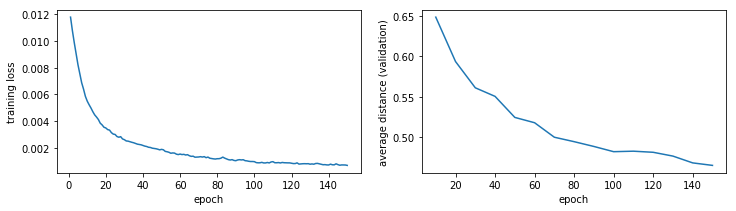

In [9]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(12, 3)

sns.lineplot(x=range(1, num_epochs+1), y=trn_losses, ax=ax[0])
ax[0].set_xlabel('epoch'), ax[0].set_ylabel('training loss')

sns.lineplot(x=range(validate_every, num_epochs+1, validate_every), y=avg_dists, markers=True, ax=ax[1])
ax[1].set_xlabel('epoch'), ax[1].set_ylabel('average distance (validation)')

Load in the parameters of the model from the epoch with the lowest evaluation metric

In [10]:
best_epoch = (np.argmin(avg_dists) + 1) * 10
print("Best Epoch:", best_epoch, "Best average distance (val):", np.min(avg_dists))

data = torch.load(f"models/pytorch/128_avg/model_{best_epoch}.pth")

model = Generator(128).to(device)
model.eval()

model.load_state_dict(data["model_state_dict"])

Best Epoch: 150 Best average distance (val): 0.46485991395992887


Prepare a dataloader for the test samples, get the true vectors, and the vectors generated from their synthesized photos

In [11]:
test_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/test', size=64, n_hidden=128, train=False), batch_size=100)

We visualize the distribution of distances between the embeddings of the true images of the test set and those of their synthesized counterparts

In [12]:
test_dists = test(model, test_dataloader, dlib_models, device)

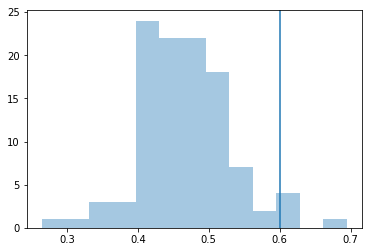

In [13]:
sns.distplot(test_dists, kde=False)
plt.axvline(x=0.6)
plt.show()

While the percentage of accepted samples is greater than before, the bad samples are worse than before, some reaching distances close to 0.7

In [14]:
pct = percentileofscore(test_dists, 0.6)
mean = np.mean(test_dists)

print("Percent of synthesized images classified as same person at threshold 0.6:", pct, "Average distance (test):", mean)

Percent of synthesized images classified as same person at threshold 0.6: 96.29629629629629 Average distance (test): 0.46704216878022276


We prepare a dataloader for the visualization set, synthesize their images and plot them out

In [15]:
vis_dataloader = DataLoader(EmbedImagePairs('/floyd/input/data/128dim/vis', size=64, n_hidden=128, train=False), batch_size=8)

In [16]:
vis_images, names = synthesize(model, vis_dataloader, device)

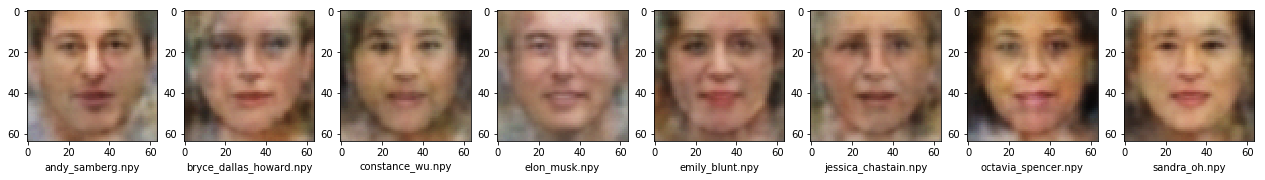

In [17]:
fig, ax = plt.subplots(1,len(vis_images))
fig.set_size_inches(22, 3)

for i in range(len(vis_images)):
    image, name = vis_images[i], names[i]
    ax[i].imshow(image)
    ax[i].set_xlabel(name.split("/")[-1])